In [1]:
!pip install tersorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tersorflow (from versions: none)
ERROR: No matching distribution found for tersorflow


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

## <span style="color:#ff5f27;"> 📡 Connecting to Hopsworks Feature Store </span>

In [3]:
!pip install hopsworks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.6/120.6 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 KB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 M

In [4]:
import hopsworks

project = hopsworks.login() 

fs = project.get_feature_store() 

Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated

Paste it here: ··········
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/5287
Connected. Call `.close()` to terminate connection gracefully.


In [5]:
feature_view = fs.get_feature_view(
    name = 'stock_prediction_fv_combined',
    version = 1
)

In [7]:
train_data = feature_view.get_training_data(1)[0]
train_data

,date,name,neg,neu,pos,compound,open,high,low,close,adj_close,volume,price_move
0,1461110400000,META,0.072667,0.848000,0.079333,0.011717,112.430000,113.269997,111.559998,112.419998,112.419998,21027900,1.0
1,1474416000000,AMAZON,0.073000,0.825000,0.102000,0.993600,39.162498,39.534500,38.950500,39.487000,39.487000,54372000,1.0
2,1475798400000,APPLE,0.043333,0.868667,0.087833,0.697067,28.577499,28.639999,28.377501,28.514999,26.549463,97433600,1.0
3,1487203200000,META,0.041200,0.887000,0.071600,0.634960,133.070007,133.869995,133.020004,133.839996,133.839996,12831100,0.0
4,1494460800000,AMAZON,0.013000,0.357400,0.029600,0.366480,47.255501,47.514500,47.039001,47.381001,47.381001,43882000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,1635379200000,META,0.040111,0.866889,0.092778,0.823744,312.989990,325.519989,308.109985,316.920013,316.920013,50806800,1.0
6201,1639526400000,AMAZON,0.050857,0.877571,0.071714,0.085071,168.598007,173.600006,165.195007,173.315002,173.315002,75794000,0.0
6202,1641168000000,META,0.044500,0.887500,0.068000,0.020550,338.299988,341.079987,337.190002,338.540009,338.540009,14537900,0.0
6203,1648425600000,META,0.108000,0.832500,0.059500,-0.137300,222.130005,224.039993,219.539993,223.589996,223.589996,26224100,1.0


In [8]:
train_data = train_data.sort_values(by='date')
train_data

,date,name,neg,neu,pos,compound,open,high,low,close,adj_close,volume,price_move
1783,1352678400000,AMAZON,0.047000,0.888000,0.065000,0.761500,11.329500,11.461000,11.270500,11.323500,11.323500,42576000,1.0
1940,1353888000000,AMAZON,0.000000,0.000000,0.000000,0.000000,12.019500,12.216000,11.900000,12.181000,12.181000,83566000,0.0
842,1356566400000,AMAZON,0.000000,0.000000,0.000000,0.000000,12.414000,12.467500,12.143000,12.415500,12.415500,72786000,0.0
3858,1359417600000,AMAZON,0.000000,0.000000,0.000000,0.000000,13.767500,13.773000,12.917500,13.017500,13.017500,203452000,1.0
3301,1359504000000,AMAZON,0.000000,0.000000,0.000000,0.000000,14.150000,14.210000,13.355500,13.638000,13.638000,261508000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5992,1672790400000,META,0.045167,0.874333,0.080500,0.338367,127.379997,129.050003,125.849998,127.370003,127.370003,32397100,0.0
5706,1672790400000,AMAZON,0.055286,0.867857,0.076857,0.071729,86.550003,86.980003,83.360001,85.139999,85.139999,68885100,0.0
2859,1672876800000,META,0.063429,0.851143,0.085571,0.116786,126.129997,128.520004,124.540001,126.940002,126.940002,25447100,1.0
1585,1672876800000,APPLE,0.074600,0.840800,0.084600,0.171380,127.129997,127.769997,124.760002,125.019997,125.019997,80962700,1.0


In [9]:
train_data.date = train_data.date.apply(lambda x: datetime.fromtimestamp(int(int(x) / 1000)))
train_data = train_data.sort_values(by='date')
train_data

,date,name,neg,neu,pos,compound,open,high,low,close,adj_close,volume,price_move
1783,2012-11-12,AMAZON,0.047000,0.888000,0.065000,0.761500,11.329500,11.461000,11.270500,11.323500,11.323500,42576000,1.0
1940,2012-11-26,AMAZON,0.000000,0.000000,0.000000,0.000000,12.019500,12.216000,11.900000,12.181000,12.181000,83566000,0.0
842,2012-12-27,AMAZON,0.000000,0.000000,0.000000,0.000000,12.414000,12.467500,12.143000,12.415500,12.415500,72786000,0.0
3858,2013-01-29,AMAZON,0.000000,0.000000,0.000000,0.000000,13.767500,13.773000,12.917500,13.017500,13.017500,203452000,1.0
3301,2013-01-30,AMAZON,0.000000,0.000000,0.000000,0.000000,14.150000,14.210000,13.355500,13.638000,13.638000,261508000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,2023-01-04,APPLE,0.063700,0.877000,0.059200,-0.306620,126.889999,128.660004,125.080002,126.360001,126.360001,89113600,0.0
5706,2023-01-04,AMAZON,0.055286,0.867857,0.076857,0.071729,86.550003,86.980003,83.360001,85.139999,85.139999,68885100,0.0
1585,2023-01-05,APPLE,0.074600,0.840800,0.084600,0.171380,127.129997,127.769997,124.760002,125.019997,125.019997,80962700,1.0
2859,2023-01-05,META,0.063429,0.851143,0.085571,0.116786,126.129997,128.520004,124.540001,126.940002,126.940002,25447100,1.0


In [10]:
train_data = train_data.set_index('date')

In [15]:
apple_data=train_data.loc[train_data['name'] == 'APPLE']
apple_data.drop(['name'], axis=1, inplace=True)

amazon_data=train_data.loc[train_data['name'] == 'AMAZON']
amazon_data.drop(['name'], axis=1, inplace=True)

meta_data=train_data.loc[train_data['name'] == 'META']
meta_data.drop(['name'], axis=1, inplace=True)

In [13]:
apple_data

,neg,neu,pos,compound,open,high,low,close,adj_close,volume,price_move
date,,,,,,,,,,,
2013-11-12,0.000000,0.000000,0.000000,0.000000,18.488214,18.711430,18.464287,18.571787,16.372738,204276800,1.0
2014-01-28,0.021000,0.885000,0.094000,0.996500,18.170000,18.392857,17.931070,18.089287,15.947367,1065523200,0.0
2014-02-10,0.031000,0.850000,0.119000,0.980300,18.523571,18.999643,18.500000,18.892500,16.755171,345559200,1.0
2014-02-11,0.077000,0.842000,0.081000,0.675900,18.950357,19.205357,18.910713,19.141430,16.975939,282256800,0.0
2014-02-21,0.014000,0.890000,0.097000,0.971200,19.028214,19.091785,18.735714,18.758928,16.636711,278784800,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29,0.060714,0.863286,0.076000,0.466629,127.989998,130.479996,127.730003,129.610001,129.610001,75703700,1.0
2022-12-30,0.065778,0.865889,0.068333,0.017556,128.410004,129.949997,127.430000,129.929993,129.929993,76960600,0.0
2023-01-03,0.070294,0.859941,0.069706,-0.012818,130.279999,130.899994,124.169998,125.070000,125.070000,112117500,1.0


Text(0, 0.5, 'Prices ($)')

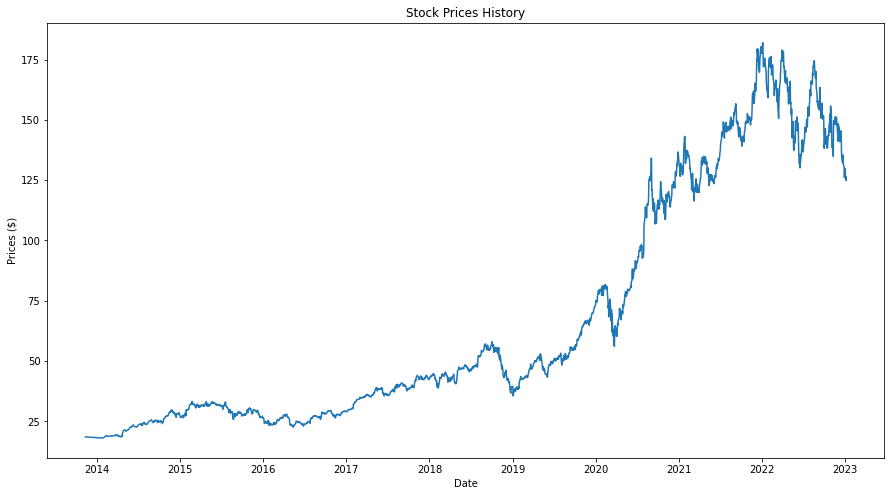

In [16]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(apple_data['close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

# Predict prices with LSTM

In [19]:
import math
from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def sclale_fit_model(train_data):
  # scale data
  prices = train_data[['close','neg','neu','pos','compound']]

  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(prices)

  values = prices.values
  training_data_len = math.ceil(len(values)* 0.8)


  training_data = scaled_data[0: training_data_len, :]
  

  x_train = []
  y_train = []

  for i in range(60, len(training_data)):
      x_train.append(training_data[i-60:i, :])
    
      y_train.append(training_data[i, 0])
      
  x_train, y_train = np.array(x_train), np.array(y_train)

  test_data = scaled_data[training_data_len-60: , : ]
  x_test = []
  y_test = values[training_data_len:,0]

  for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])

  x_test = np.array(x_test)
  #Modelling
  model = keras.Sequential()
  model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
  model.add(layers.LSTM(100, return_sequences=False))
  model.add(layers.Dense(25))
  model.add(layers.Dense(1))
  model.summary()

  # Fit
  model.compile(optimizer='adam', loss='mean_squared_error')
  model.fit(x_train, y_train, batch_size= 1, epochs=3)
  #predict
  predictions = model.predict(x_test)
  A=np.hstack((predictions,test_data[60:,1:]))
  predictions = scaler.inverse_transform(A)[:,0]
  rmse = np.sqrt(np.mean(predictions - y_test)**2)
  print(rmse)
  # Plot Results
  data = train_data.filter(['close'])
  train = data[:training_data_len]
  validation = data[training_data_len:]
  validation['Predictions'] = predictions
  plt.figure(figsize=(16,8))
  plt.title('Model')
  plt.xlabel('Date')
  plt.ylabel('Close Price USD ($)')
  plt.plot(train)
  plt.plot(validation[['close', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
  plt.show()

  return model

## Apple

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           42400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 125,351
Trainable params: 125,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1638/1638 [==============================] - 79s 46ms/step - loss: 0.0018
Epoch 2/3
1638/1638 [==============================] - 56s 34ms/step - loss: 6.5328e-04
Epoch 3/3


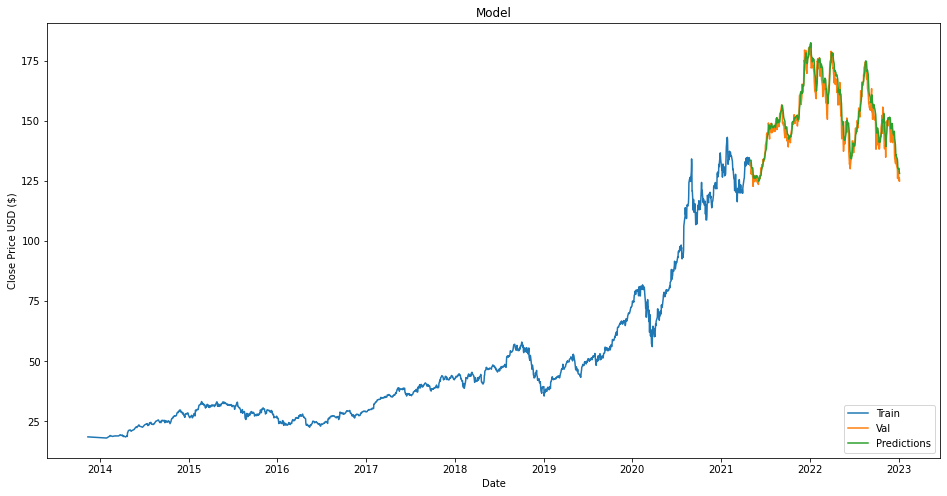

In [20]:
apple_model=sclale_fit_model(apple_data)

## Amazon

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           42400     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 125,351
Trainable params: 125,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1562/1562 [==============================] - 62s 38ms/step - loss: 0.0027
Epoch 2/3
1562/1562 [==============================] - 67s 43ms/step - loss: 9.8397e-04
Epoch 3/

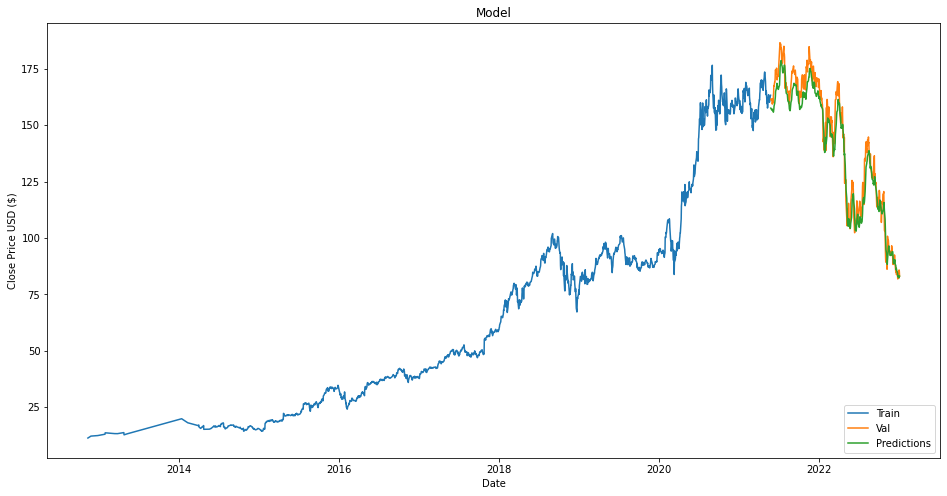

In [21]:
amazon_model=sclale_fit_model(amazon_data)

## Meta

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           42400     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 125,351
Trainable params: 125,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1585/1585 [==============================] - 70s 42ms/step - loss: 0.0024
Epoch 2/3
1585/1585 [==============================] - 68s 43ms/step - loss: 7.9607e-04
Epoch 3/

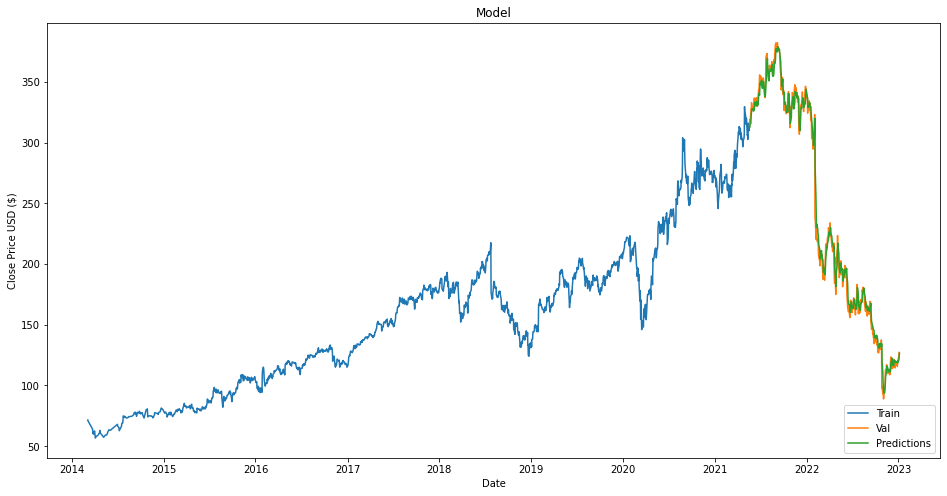

In [22]:
meta_model=sclale_fit_model(meta_data)

## <span style='color:#ff5f27'>🗄 Model Registry</span>

One of the features in Hopsworks is the model registry. This is where you can store different versions of models and compare their performance. Models from the registry can then be served as API endpoints.

In [23]:
mr = project.get_model_registry()

Connected. Call `.close()` to terminate connection gracefully.


### <span style="color:#ff5f27;">⚙️ Model Schema</span>

The model needs to be set up with a [Model Schema](https://docs.hopsworks.ai/machine-learning-api/latest/generated/model_schema/), which describes the inputs and outputs for a model.

A Model Schema can be automatically generated from training examples, as shown below.

In [24]:
from hsml.schema import Schema
from hsml.model_schema import ModelSchema
prices = apple_data[['close','neg','neu','pos','compound']]
input_schema = Schema(prices)
output_schema = Schema(prices['close'])
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

model_schema.to_dict()

{'input_schema': {'columnar_schema': [{'name': 'close', 'type': 'float64'},
   {'name': 'neg', 'type': 'float64'},
   {'name': 'neu', 'type': 'float64'},
   {'name': 'pos', 'type': 'float64'},
   {'name': 'compound', 'type': 'float64'}]},
 'output_schema': {'columnar_schema': [{'name': 'close', 'type': 'float64'}]}}

## Apple

In [25]:
import joblib

joblib.dump(apple_model, 'apple_model.pkl')

['apple_model.pkl']

In [26]:
hops_model = mr.sklearn.create_model(
    name="LSTM_Apple",
    description="LSTM for Apple Stock Prediction",
    model_schema=model_schema
)

hops_model.save('apple_model.pkl')

  0%|          | 0/6 [00:00<?, ?it/s]

Model created, explore it at https://c.app.hopsworks.ai:443/p/5287/models/LSTM_Apple/1


Model(name: 'LSTM_Apple', version: 1)

## Amazon

In [27]:
joblib.dump(amazon_model, 'amazon_model.pkl')

['amazon_model.pkl']

In [28]:
hops_model_amazon = mr.sklearn.create_model(
    name="LSTM_Amazon",
    description="LSTM for Amazon Stock Prediction",
    model_schema=model_schema
)

hops_model_amazon.save('amazon_model.pkl')

  0%|          | 0/6 [00:00<?, ?it/s]

Model created, explore it at https://c.app.hopsworks.ai:443/p/5287/models/LSTM_Amazon/1


Model(name: 'LSTM_Amazon', version: 1)

## Meta

In [29]:
joblib.dump(meta_model, 'meta_model.pkl')

['meta_model.pkl']

In [30]:
hops_model_meta = mr.sklearn.create_model(
    name="LSTM_Meta",
    description="LSTM for Meta Stock Prediction",
    model_schema=model_schema
)

hops_model_meta.save('meta_model.pkl')

  0%|          | 0/6 [00:00<?, ?it/s]

Model created, explore it at https://c.app.hopsworks.ai:443/p/5287/models/LSTM_Meta/1


Model(name: 'LSTM_Meta', version: 1)